# This notebook generates the plots in the paper.

In [3]:
using DelimitedFiles:readdlm
using PyPlot
include("utils1.jl")

Ωgw23 (generic function with 1 method)

In [112]:
yr = 365.25*24*3600 # year in seconds
fyr = yr^-1
fyr = 1e-11

1.0e-11

In [113]:
H0 = 2.192711267238057e-18;

sqrt(2.271e18)*H0

3.3043802316084268e-9

In [114]:
# f_star as a function of mpbh
fstar(mpbh) = 2.8760950429212986e-9/sqrt(mpbh)

fstar (generic function with 1 method)

In [115]:
Ωgw23(A95fyr, mpbh, fyr)

4.42837032283358e-13

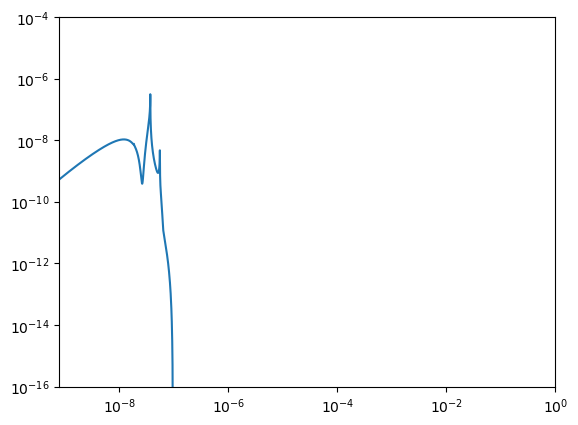

PyObject <matplotlib.collections.LineCollection object at 0x7efe5cf74590>

In [116]:
fs = 10 .^ (range(-10, stop=-6, length=5000))
mpbhfyr = 8e-3
A95fyr = 0.011664474187753906

loglog(fs, Ωgw23.(A95fyr, mpbhfyr, fs))
ylim(1e-16, 1e-4)
xlim(8e-10, 10e-1)
vlines(x=fyr, ymin=1e-17, ymax=1e4, linestyle=":", color="black")

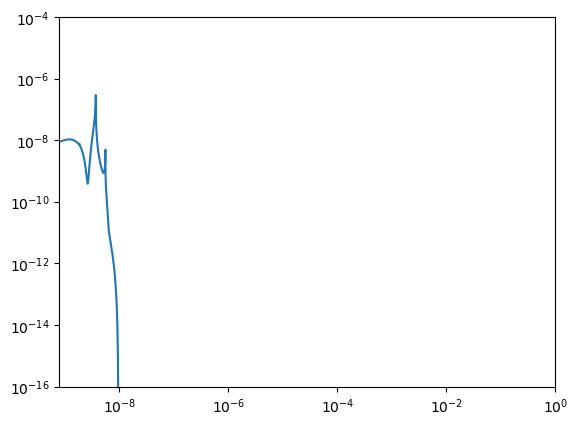

PyObject <matplotlib.collections.LineCollection object at 0x7efe5e737690>

In [117]:
fs = 10 .^ (range(-10, stop=-6, length=5000))
mpbhfyr = 8e-1
A95fyr = 0.011664474187753906

loglog(fs, Ωgw23.(A95fyr, mpbhfyr, fs))
ylim(1e-16, 1e-4)
xlim(8e-10, 10e-1)
vlines(x=fyr, ymin=1e-17, ymax=1e4, linestyle=":", color="black")

In [120]:
results = readdlm("results.txt")

bfs = results[:, 4]
bf_errs = results[:, 5]

results0 = readdlm("results0.txt")

mpbhs = results0[:, 1]
A95s = results0[:, 2]
fpbh95s = results0[:, 3];
fstars = fstar.(mpbhs);

Ωgw95s = Ωgw23.(A95s, mpbhs, fyr);

## Figure 1

In [140]:
labelSize = 15
tickSize = 12

12

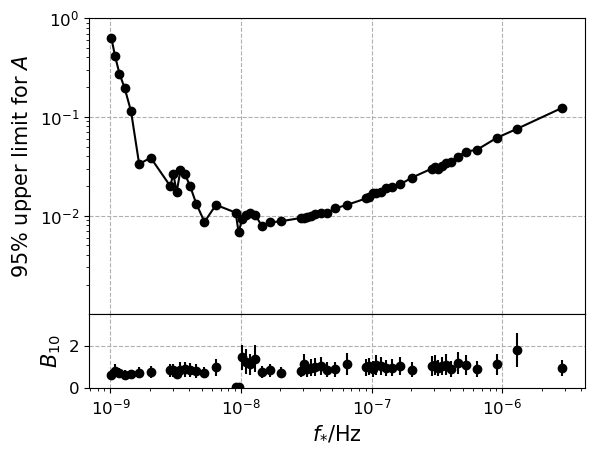

In [142]:
subplots_adjust(hspace=0.0) # Set the vertical spacing between axes
ncol = 5;
ax1 = subplot2grid((ncol,1), (0,0), rowspan=ncol-1)
setp(ax1.get_xticklabels(),visible=false) # Disable x tick labels

loglog(fstars, A95s, "-o", color="black")
ylim(1.01e-3, 1e0)
xlabel(L"$f_{*}$/Hz", fontsize=labelSize)
ylabel(L"$95\%$ upper limit for $A$", fontsize=labelSize)
grid("on", linestyle="--")
xticks(fontsize=tickSize)
yticks(fontsize=tickSize)

ax2 = subplot2grid((ncol, 1), (ncol-1,0), sharex=ax1)

errorbar(fstars, bfs, yerr=bf_errs, fmt="o", color="black")
semilogx()
ylim(0, 3.5)
xlabel(L"$f_{*}$/Hz", fontsize=labelSize)
ylabel(L"$B_{10}$", fontsize=labelSize)
grid("on", linestyle="--")
xticks(fontsize=tickSize)
yticks(fontsize=tickSize)
show()

savefig("../../latex/prl/A_upper.pdf", bbox_inches="tight")
savefig("../../latex/nature/figures/A_upper.pdf", bbox_inches="tight")

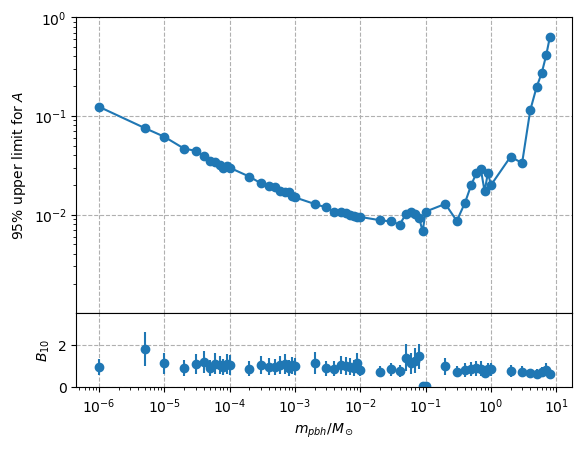

In [6]:
subplots_adjust(hspace=0.0) # Set the vertical spacing between axes
ncol = 5;
ax1 = subplot2grid((ncol,1), (0,0), rowspan=ncol-1)
setp(ax1.get_xticklabels(),visible=false) # Disable x tick labels

loglog(mpbhs, A95s, "-o")
ylim(1.01e-3, 1e0)
xlabel(L"$m_{pbh}/M_\odot$")
ylabel(L"$95\%$ upper limit for $A$")
grid("on", linestyle="--")

ax2 = subplot2grid((ncol, 1), (ncol-1,0), sharex=ax1)

errorbar(mpbhs, bfs, yerr=bf_errs, fmt="o")
semilogx()
ylim(0, 3.5)
xlabel(L"$m_{pbh}/M_\odot$")
ylabel(L"$B_{10}$")
grid("on", linestyle="--")
show()

## Figure 2

### Constraints from other experiments.

In [7]:
experimentsInUse = ["eros", "ufd", "cmb", "bkg", "wd", "kepler", "hsc", "ogle", "sgwb"];

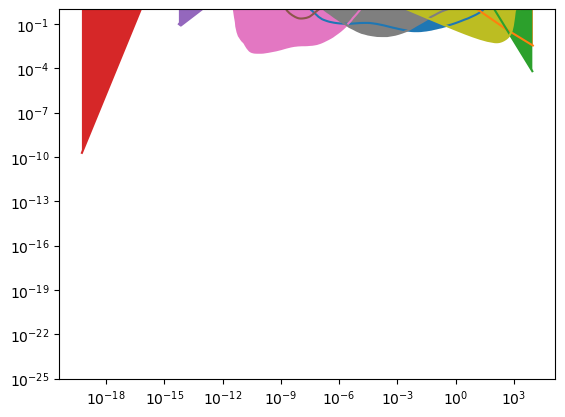

(1.0e-25, 1)

In [8]:
for experiment in experimentsInUse
    result = readdlm("./constraints/" * experiment * ".txt")
    loglog(result[:, 1], result[:, 2])
    fill_between(result[:, 1], result[:, 2], 1)
end
ylim(1e-25, 1)

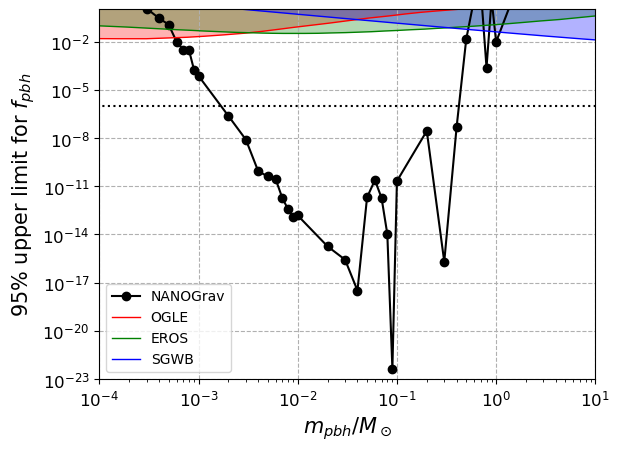

In [143]:
loglog(mpbhs, fpbh95s, "-o", color="black", label="NANOGrav")

experimentsInUse2 = ["ogle", "eros", "sgwb", "ligo-o2-subsolar"]
colors = ["red", "green", "blue", "magenta"]
for i in 1:3
    experiment = experimentsInUse2[i]
    color = colors[i]
    result = readdlm("./constraints/" * experiment * ".txt")
    fs, fpbhs = result[:, 1], result[:, 2]
    loglog(fs, fpbhs, color=color, label=uppercase(experiment), linewidth=1.0)
    fill_between(fs, fpbhs, 1, alpha=0.3, facecolor=color)
end

hlines(y=1e-6, xmin=0.0, xmax=1e4, linestyle=":", color="black")

xlim(1e-4, 1e1)
ylim(1e-23, 1)
xlabel(L"$m_{pbh}/M_\odot$", fontsize=labelSize)
ylabel(L"$95\%$ upper limit for $f_{pbh}$", fontsize=labelSize)
grid("on", linestyle="--")
xticks(fontsize=tickSize)
yticks(fontsize=tickSize)
legend()
show()

savefig("../../latex/prl/fpbh_upper.pdf", bbox_inches="tight")
savefig("../../latex/nature/figures/fpbh_upper.pdf", bbox_inches="tight")

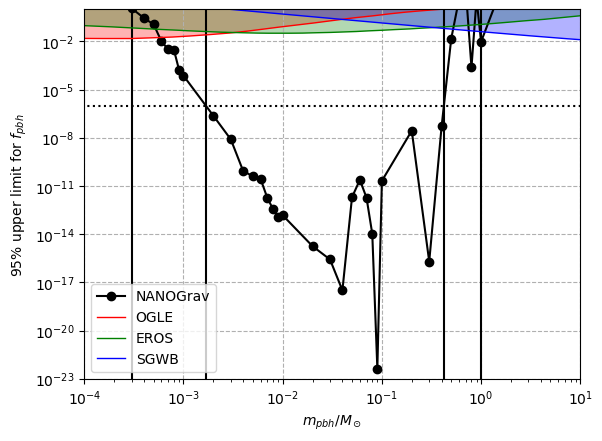

In [25]:
loglog(mpbhs, fpbh95s, "-o", color="black", label="NANOGrav")

experimentsInUse2 = ["ogle", "eros", "sgwb", "ligo-o2-subsolar"]
colors = ["red", "green", "blue", "magenta"]
for i in 1:3
    experiment = experimentsInUse2[i]
    color = colors[i]
    result = readdlm("./constraints/" * experiment * ".txt")
    fs, fpbhs = result[:, 1], result[:, 2]
    loglog(fs, fpbhs, color=color, label=uppercase(experiment), linewidth=1.0)
    fill_between(fs, fpbhs, 1, alpha=0.3, facecolor=color)
end

hlines(y=1e-6, xmin=0.0, xmax=1e4, linestyle=":", color="black")
vlines(x=1.7e-3, ymin=1e-25, ymax=1)
vlines(x=4.2e-1, ymin=1e-25, ymax=1)
vlines(x=3e-4, ymin=1e-25, ymax=1)
vlines(x=1e0, ymin=1e-25, ymax=1)
xlim(1e-4, 1e1)
ylim(1e-23, 1)
xlabel(L"$m_{pbh}/M_\odot$")
ylabel(L"$95\%$ upper limit for $f_{pbh}$")
grid("on", linestyle="--")
legend()
show()

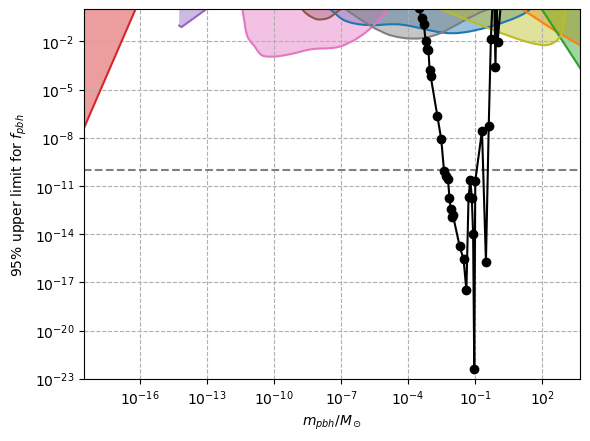

In [11]:
for experiment in experimentsInUse
    result = readdlm("./constraints/" * experiment * ".txt")
    loglog(result[:, 1], result[:, 2])
    fill_between(result[:, 1], result[:, 2], 1, alpha=0.45)
end
loglog(mpbhs, fpbh95s, "-o", color="black")
hlines(y=1e-10, xmin=0.0, xmax=1e4, linestyle="--", color="gray")

xlim(10^-18.5, 10^3.7)
ylim(1e-23, 1)
xlabel(L"$m_{pbh}/M_\odot$")
ylabel(L"$95\%$ upper limit for $f_{pbh}$")
grid("on", linestyle="--")
show()

# savefig("../../latex/fpbh_upper.pdf", bbox_inches="tight")

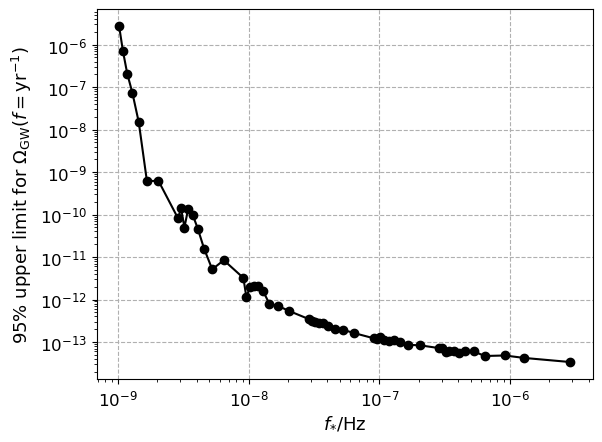

In [135]:


loglog(fstars, Ωgw95s, "-o", color="black")
# xlim(10^-18.5, 10^3.7)
# ylim(1.01e-3, 1e0)
xlabel(L"$f_{*}$/Hz", fontsize=labelSize)
ylabel(L"$95\%$ upper limit for $\Omega_{\rm{GW}}(f=\rm{yr}^{-1})$", fontsize=labelSize)
grid("on", linestyle="--")
xticks(fontsize=tickSize)
yticks(fontsize=tickSize)
show()

# savefig("../../latex/prl/A_upper.pdf", bbox_inches="tight")
# savefig("../../latex/nature/figures/A_upper.pdf", bbox_inches="tight")

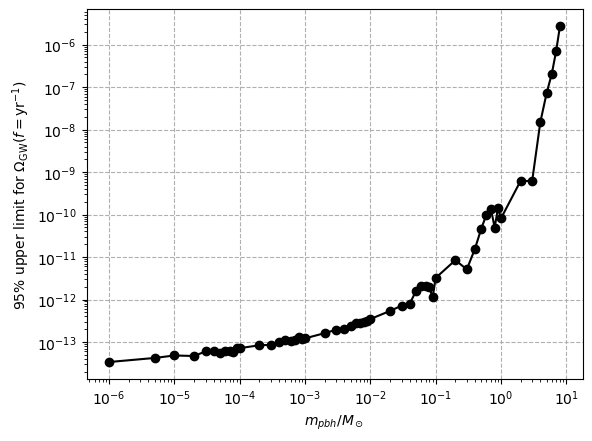

In [122]:
loglog(mpbhs, Ωgw95s, "-o", color="black")
# xlim(10^-18.5, 10^3.7)
# ylim(1.01e-3, 1e0)
xlabel(L"$m_{pbh}/M_\odot$")
ylabel(L"$95\%$ upper limit for $\Omega_{\rm{GW}}(f=\rm{yr}^{-1})$")
grid("on", linestyle="--")
show()